In [20]:
import sys

sys.path.append("..")
import numpy as np
import pandas as pd

import src.plots as plots
from src.util import Profile, savings_fixed_policy

ImportError: cannot import name 'Profile' from 'src.util' (/Users/fabiogruschka/Documents/projekte/fp-mara/simulations/../src/util.py)

In [ ]:
mara = Profile(1, 1_904_504, 20, 30000, 85000, 0.03, 0.157, 0, True)
savings = savings_fixed_policy(mara, contrib=0)
plots.plot_bar(savings, mara)

NameError: name 'Profile' is not defined

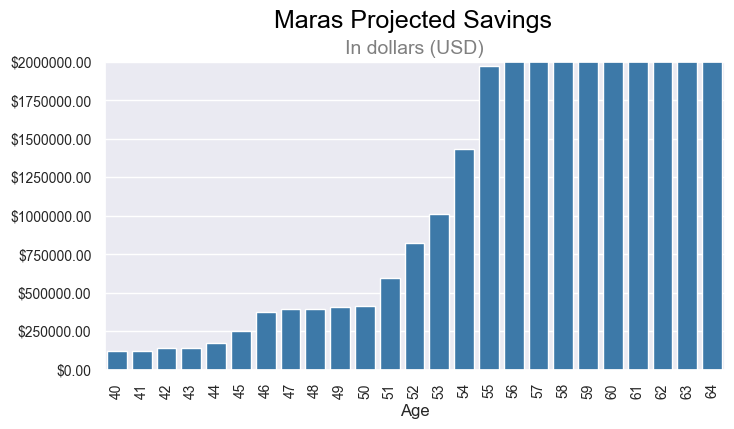

In [ ]:
mara = Profile(40, 1_904_504, 25, 150_000, 100_000, 0.03, 0.107, 0.1531, True)
savings = savings_fixed_policy(mara, contrib=0, seed=2)
plots.plot_bar(savings, mara)

## Monte Carlo Simulation

In [ ]:
n_sim = 10000
savings_simulations = np.zeros([n_sim, mara.target_year])
seeds = np.arange(n_sim)
for sim in range(n_sim):
    mara = Profile(1, 0, 25, 150_000, 100_000, 0.03, 0.107, 0.1531, True)
    savings_simulations[sim] = savings_fixed_policy(mara, contrib=0, seed=sim)

In [ ]:
mara = Profile(40, 1_849_617, 25, 200_000, 100_000, 0.03, 0.09, 0.1531, True)
year = [i + mara.current_age for i in list(range(mara.target_year))]
df = pd.DataFrame(savings_simulations)
df.columns = year

/Users/fabiogruschka/Documents/projekte/fp-mara/simulations/../src/plots.py:114: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


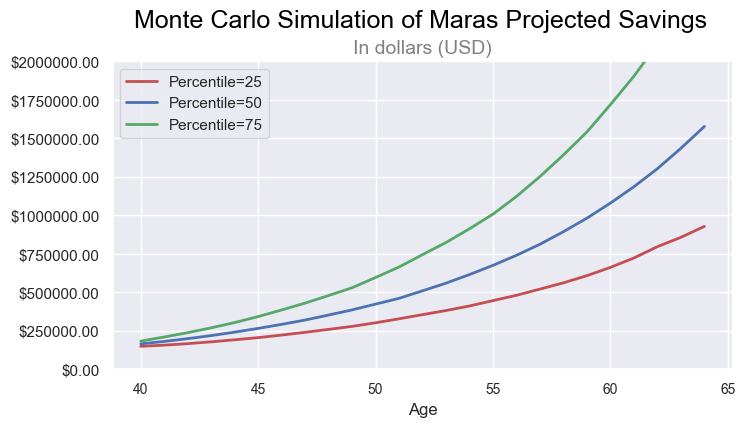

In [ ]:
plots.plot_simulation_percentiles(mara, savings_simulations)